In [11]:
%pip install -r ../requirements.txt
%pip install -e ../

Note: you may need to restart the kernel to use updated packages.
Obtaining file:///Users/mirko/Developer/LearningMicrograd
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for micrograd (pyproject.toml) ... done
  Created wheel for micrograd: filename=micrograd-0.1.0-0.editable-py3-none-any.whl size=3766 sha256=a728a783991764760379379afb78260da37f28c3bf81852514770dfa33e026d1
  Stored in directory: /private/var/folders/p8/f0ql1fmx0yqbsmkfmx969hpm0000gn/T/pip-ephem-wheel-cache-pna1fjaq/wheels/a6/60/b3/d9423b3db2435b547becb98798b3a4fc99cf8a693d459fdbf3
Successfully built micrograd
  Attempting uninstall: micrograd
    Found existing installation: micrograd 0.1.0
    Uninstalling micrograd-0.1.0:
      Successfully uninstalled micrograd-0.1.0
Note: you may need to restart the kernel to use updated packages.


In [12]:
from graphviz import Digraph # Remember to have graphviz installed on pc, not only python package
from micrograd import Value

In [13]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    Format: png | svg | ...
    Rankdir: TB (top to bottom) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

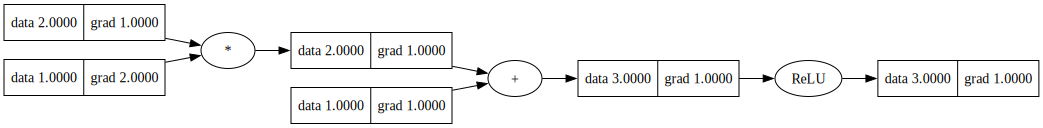

In [14]:
# Simple example
x = Value(1.0)
y = (x * 2 + 1).relu()
y.backward()
draw_dot(y)

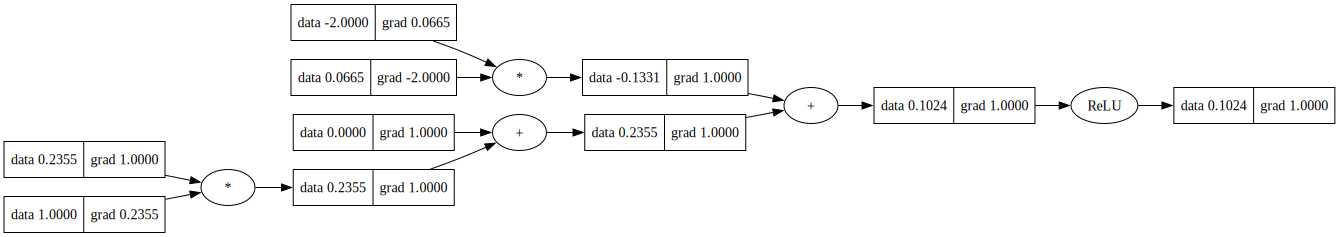

In [15]:
# Simple 2D neuron
import random
from micrograd import Neuron, Value

random.seed(1337)
n = Neuron(2)
x = [Value(1.0), Value(-2.0)]
y = n(x)
y.backward()

draw_dot(y)